# Data Sets And Numpy

A learning example is comprised of a set of *features* (or *attributes*, or *dimensions*).  In the case where the features are real-valued, each example can be considered a *vector* or a *point*. Let $x$ represent an individual example. Let $d$ be the dimensionality of $x$ Thus, each example $x$ is a single point where $x \in \mathbb{R}^{d}$.

In Python, example data is typically store in matrix form.  In ML, this data can be
stored 2 ways, in rows, as shown on the left, and in columns, as is shown on the right. 

$
\begin{bmatrix} 
--        &    x^{(1)}    & -- \\
--        &    x^{(2)}     & -- \\ 
--         & ...             & -- \\
--         & x^{(m)}    & --   \\
\end{bmatrix}
$ or
$
\begin{bmatrix} 
|            &     |         & |    &   |     \\
x^{(1)}   & x^{(2)}& ... & x^{(m)} \\
|            &     |         & |    &   |     \\
\end{bmatrix}
$

### QUESTION
*   Consider two points, $x^{(1)}$ = (1,3) and $x^{(2)}$ = (2,5).
Calculate, by hand, the Euclidean distance between these two points. 
Recall that the the formula for Euclidean distance is $$\sqrt { \sum_{i=0}^{d-1}{(x_{i}^{(1)} - x_{i}^{(2)})^2}}$$. 


---
## PART 1 - Processing Numpy Arrays Using Loops

Until now, you have primarily used *for* loops for performing mathematical operations
on arrays of numbers.  As an example of doing this in Python, you can use a loop to work 
with a numpy vector:

In [1]:
import numpy as np
x = np.random.rand(10)
sum_x = 0
for i in range(x.shape[0]):
    sum_x += x[i]

### Exercise 1

Open `distances.py` in an editor and complete the `distance_loop` function using a for loop. You can test your implementation by executing the cell below.

In [2]:
# Run this cell as a test...
%reload_ext autoreload
%autoreload 2
np.set_printoptions(precision=2)

import distances

a = np.array([1.0, 2.0, 3.0])
b = np.array([0.0, 1.0, 4.0])

print(distances.distance_loop(a, b)) # answer should be 1.7320508075688772

1.7320508075688772


### Exercise 2
Later in the semester, we will study the *K-Nearest Neighbors* algorithm.  The simplest version is 1-Nearest Neighbors, which classifies a target point by searching through the training data to find the single point that is nearest to the target, and using the class of that point as a prediction.  Use for loops, and your completed `distance_loop` function, to complete the `nearest_loop` function (which would be useful for implementing 1-Nearest Neighbors classifier). 

Some useful facts/reminders:

In [4]:
# The shape attribute returns a tuple containing the shape of a numpy array:

X = np.random.random((5,3))
print(X)
print(X.shape)

[[0.89 0.42 0.87]
 [0.07 0.78 0.04]
 [0.95 0.64 0.03]
 [0.4  0.14 0.22]
 [0.52 0.07 0.82]]
(5, 3)


In [5]:
# Slicing can be used to extract a single row or column from a numpy array.  
# This extracts the middle column from X:

print(X[:,1])

[0.42 0.78 0.64 0.14 0.07]


Execute the cell below to test your implementation.

In [6]:
data = np.array([[0.71, 0.74, 0.06],
                 [0.86, 0.5 , 0.18],
                 [0.35, 0.47, 0.03],
                 [0.57, 0.32, 0.65],
                 [0.3 , 0.17, 0.21],
                 [0.15, 1.  , 0.74]])
point = np.array([.6, .3, .7])

print(distances.nearest_loop(data, point)) # Should print 3

3


## PART 2 - Processing Numpy Arrays WITHOUT Loops

Loops in Python are sllloooowwww.  The key to writing fast numerical programs in Python is to avoid loops by taking advantage of numpy operators and library calls.

### Exercise 3

Complete the `distance` function in `distances.py`.  The functionality should be exactly the same as `distance_loop`, but your implementation *should not contain any loops* (or list comprehensions).  Execute the following cells to test your implementation and compare the speed to our previous version.

In [7]:
# TEST CORRECTNESS
%reload_ext autoreload
%autoreload 2

a = np.array([1.0, 2.0, 3.0])
b = np.array([0.0, 1.0, 4.0])

print(distances.distance(a, b)) # answer should be 1.7320508075688772

1.7320508075688772


In [8]:
# TEST SPEED
dim = 10000 # Try changing this value to see how it impacts the running times.
a = np.random.random(dim)
b = np.random.random(dim)
%timeit distances.distance_loop(a, b)
%timeit distances.distance(a, b)

7.05 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
36 µs ± 502 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Exercise 4

Complete the `nearest` function in `distances.py`. The functionality should be exactly the same as `nearest_loop`, but your implementation should not contain any loops (or list comprehensions). Execute the following cells to test your implementation and compare the speed to the earlier version.  Note that your updated implementation should *not* call your `distance` function... doing so would require you to loop through all of the rows of `X`.

Reminders/Hints:

In [9]:
# "Broadcasting" can be used to apply the same operation across all rows/columns of an array:
X = np.random.random((5, 3))
a = np.array([10, 20, 30])
print("X:\n{}".format(X))
print("a:\n{}".format(a))
print("\nX + a:\n{}".format(X + a))

X:
[[0.34 0.04 0.53]
 [0.38 0.85 0.32]
 [0.45 0.14 0.39]
 [0.8  0.64 0.16]
 [0.16 0.12 0.58]]
a:
[10 20 30]

X + a:
[[10.34 20.04 30.53]
 [10.38 20.85 30.32]
 [10.45 20.14 30.39]
 [10.8  20.64 30.16]
 [10.16 20.12 30.58]]


In [10]:
# argmin can be used to find the index of the smallest element in an array:
b = np.array([5, 5, 1, 5])
print(np.argmin(b))

2


Execute the cells below to test the correctness and speed of your implementation.

In [11]:
# TEST CORRECTNESS
data = np.array([[0.71, 0.74, 0.06],
                 [0.86, 0.5 , 0.18],
                 [0.35, 0.47, 0.03],
                 [0.57, 0.32, 0.65],
                 [0.3 , 0.17, 0.21],
                 [0.15, 1.  , 0.74]])
point = np.array([.6, .3, .7])

print(distances.nearest(data, point)) # Should print 3

3


In [12]:
# TEST SPEED
dim = 3
num = 100000
data1 = np.random.random((num, dim))
point1 = np.random.random(dim)

%timeit distances.nearest_loop(data1, point1)
%timeit distances.nearest(data1, point1)

1.52 s ± 28.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.81 ms ± 45.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Part 3 - Numpy Masking

The cell below loads a tiny data set of handwritten digits and displays the first digit as an image.

(1797, 64)
(1797,)


<Figure size 432x288 with 0 Axes>

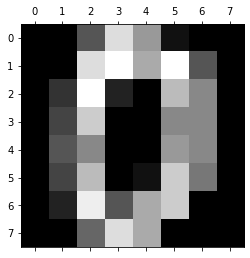

In [13]:
from sklearn.datasets import load_digits
digits, labels = load_digits(return_X_y=True)

print(digits.shape)
print(labels.shape)

# Show the fist digit in the data set:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits[0,:].reshape(8,8)) 
plt.show() 

### Exercise 5

Use numpy operations to create a smaller data set that contains only the the 1's and 7's from the data set imported above. Store the images in an array named `digits_subset` and the labels in an array named `labels_subset`

In [14]:
# YOUR CODE HERE...

print(digits_subset.shape) # should be (361, 64)
print(labels_subset.shape) # should be (361,)

NameError: name 'digits_subset' is not defined

In [ ]:
plt.gray() 
plt.matshow(digits_subset[0,:].reshape(8,8)) # should be a "1"
plt.figure()
plt.matshow(digits_subset[180,:].reshape(8,8))  # should be "7"
plt.show() 